<a href="https://colab.research.google.com/github/jhlee508/pytorch-advanced/blob/master/chapter6_gan_anomaly_detection_AnoGAN%2BEfficientGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Git Clone

In [1]:
!git clone https://github.com/YutaroOgawa/pytorch_advanced.git

Cloning into 'pytorch_advanced'...
remote: Enumerating objects: 552, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 552 (delta 36), reused 47 (delta 18), pack-reused 479
Receiving objects: 100% (552/552), 17.83 MiB | 13.90 MiB/s, done.
Resolving deltas: 100% (295/295), done.


In [2]:
%cd pytorch_advanced/

/content/pytorch_advanced


In [3]:
!ls

1_image_classification	 7_nlp_sentiment_transformer
2_objectdetection	 8_nlp_sentiment_bert
3_semantic_segmentation  9_video_classification_eco
4_pose_estimation	 etc
5_gan_generation	 LICENSE
6_gan_anomaly_detection  README.md


In [4]:
%cd 6_gan_anomaly_detection/

/content/pytorch_advanced/6_gan_anomaly_detection


In [5]:
!pwd

/content/pytorch_advanced/6_gan_anomaly_detection


In [6]:
!ls

6-2_AnoGAN.ipynb		   6-4_EfficientGAN.ipynb
6_4_EfficientGAN_GoogleClab.ipynb  make_folders_and_data_downloads.ipynb


### Make Folders and Data Downloads

In [7]:
import os
import urllib.request
import zipfile
import tarfile

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

In [8]:
# data 폴더가 없으면 작성한다
data_dir = "./data/"
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

In [9]:
import sklearn
print(sklearn.__version__)

# AWS의 AMI에서 sklern의 version이 0.20보다 낮은 경우에는 버전을 업데이트합니다
# pip install -U scikit-learn

1.0.2


In [10]:
# MNIST의 필기체 숫자 화상을 다운로드하여 읽습니다
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, data_home="./data/", as_frame=False)  # data_home으로 저장

In [11]:
# 데이터 꺼내기
X = mnist.data
y = mnist.target

이 화상 데이터의 라벨은 5입니다


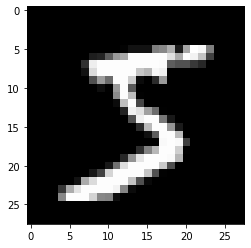

In [12]:
# MNIST의 데이터 첫 번째를 시각화
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 화상 데이터의 라벨은 {}입니다".format(y[0]))

In [13]:
# "data" 폴더의 아래에 "img_78" 폴더를 작성한다
data_dir_path = "./data/img_78/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

In [14]:
# MNIST에서 숫자7, 8의 화상만 "img_78" 폴더에 화상으로 저장해 나간다
count7=0
count8=0
max_num=200  # 화상은 200장씩 작성한다

for i in range(len(X)):
    
    # 화상7 작성
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/img_78/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64로 확대
        pil_img_f.save(file_path)  # 저장
        count7+=1 
    
    # 화상8 작성
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/img_78/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64로 확대
        pil_img_f.save(file_path)  # 저장
        count8+=1
        
    # 7과 8을 200장씩 작성했다면 break
    if (count7>=max_num) and (count8>=max_num):
        break

In [15]:
# "data" 폴더의 아래에 "test" 폴더를 작성한다
data_dir_path = "./data/test/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

In [16]:
# 위에서 7,8의 화상 작성에 사용한 index의 최종값
i_start = i+1
print(i_start)

2244


In [17]:
# MNIST에서 숫자2, 7, 8의 화상만 "test" 폴더에 화상으로 저장해 나간다
count2=0
count7=0
count8=0
max_num=5  # 화상은 5장씩 작성한다

for i in range(i_start,len(X)):  # i_start에서 시작
    
    # 화상2 작성
    if (y[i] is "2") and (count2<max_num):
        file_path="./data/test/img_2_"+str(count2)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64로 확대
        pil_img_f.save(file_path)  # 저장
        count2+=1
    
    # 화상7 작성
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/test/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64로 확대
        pil_img_f.save(file_path)  # 저장
        count7+=1 
    
    # 화상8 작성
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/test/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64로 확대
        pil_img_f.save(file_path)  # 저장
        count8+=1 

In [18]:
# "data" 폴더의 아래에 "img_78_28size" 폴더를 작성한다
data_dir_path = "./data/img_78_28size/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

In [19]:
# MNIST에서 숫자7, 8의 화상만 "img_78_28size" 폴더에 화상으로 저장해 나간다
count7=0
count8=0
max_num=200  # 화상은 200장씩 작성한다

for i in range(len(X)):
    
    # 화상7 작성
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/img_78_28size/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f.save(file_path)  # 저장
        count7+=1 
    
    # 화상8 작성
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/img_78_28size/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f.save(file_path)  # 저장
        count8+=1
    
    if (count7>=max_num) and (count8>=max_num):
        break

In [20]:
# "data" 폴더의 아래에 "test_28size" 폴더를 작성한다
data_dir_path = "./data/test_28size/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

# 위에서 7,8의 화상 작성에 사용한 index의 최종값
i_start = i+1
print(i_start)

2244


In [21]:
# MNIST에서 숫자2, 7, 8의 화상만 "test_28size" 폴더에 화상으로 저장해 나간다
count2=0
count7=0
count8=0
max_num=5  # 화상은 5장씩 작성한다

for i in range(i_start,len(X)):  # i_start에서 시작
    
    # 화상2 작성
    if (y[i] is "2") and (count2<max_num):
        file_path="./data/test_28size/img_2_"+str(count2)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f.save(file_path)  # 저장
        count2+=1 
    
    # 화상7 작성
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/test_28size/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f.save(file_path)  # 저장
        count7+=1 
    
    # 화상8 작성
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/test_28size/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 화상을 28×28의 형태로 변경
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 화상을 PIL으로
        pil_img_f.save(file_path)  # 저장
        count8+=1 

# Chapter6. GAN을 통한 이상 화상 탐지 (AnoGAN, Efficient GAN)

## AnoGAN

In [22]:
# 패키지 import
import random
import math
import time
import pandas as pd
import numpy as np
from PIL import Image

import torch
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import transforms

In [23]:
# Setup seeds
torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)

### Generator 구현

In [24]:
class Generator(nn.Module):

    def __init__(self, z_dim=20, image_size=64):
        super(Generator, self).__init__()

        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(z_dim, image_size * 8,
                               kernel_size=4, stride=1),
            nn.BatchNorm2d(image_size * 8),
            nn.ReLU(inplace=True))

        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(image_size * 8, image_size * 4,
                               kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(image_size * 4),
            nn.ReLU(inplace=True))

        self.layer3 = nn.Sequential(
            nn.ConvTranspose2d(image_size * 4, image_size * 2,
                               kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(image_size * 2),
            nn.ReLU(inplace=True))

        self.layer4 = nn.Sequential(
            nn.ConvTranspose2d(image_size * 2, image_size,
                               kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(image_size),
            nn.ReLU(inplace=True))

        self.last = nn.Sequential(
            nn.ConvTranspose2d(image_size, 1, kernel_size=4,
                               stride=2, padding=1),
            nn.Tanh())
        # 주의: 흑백 화상이므로, 출력 채널은 하나 뿐임

    def forward(self, z):
        out = self.layer1(z)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.last(out)

        return out

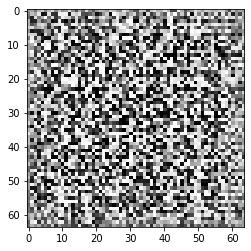

In [25]:
# 동작 확인
import matplotlib.pyplot as plt
%matplotlib inline

G = Generator(z_dim=20, image_size=64)

# 압력 난수
input_z = torch.randn(1, 20)

# 텐서 사이즈를 (1, 20, 1, 1)로 변형
input_z = input_z.view(input_z.size(0), input_z.size(1), 1, 1)

# 가짜 화상을 출력
fake_images = G(input_z)

img_transformed = fake_images[0][0].detach().numpy()
plt.imshow(img_transformed, 'gray')
plt.show()

### Discriminator 구현

In [26]:
class Discriminator(nn.Module):

    def __init__(self, z_dim=20, image_size=64):
        super(Discriminator, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(1, image_size, kernel_size=4,
                      stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True))
        # 주의: 흑백 화상이므로 입력 채널은 하나 뿐임

        self.layer2 = nn.Sequential(
            nn.Conv2d(image_size, image_size*2, kernel_size=4,
                      stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True))

        self.layer3 = nn.Sequential(
            nn.Conv2d(image_size*2, image_size*4, kernel_size=4,
                      stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True))

        self.layer4 = nn.Sequential(
            nn.Conv2d(image_size*4, image_size*8, kernel_size=4,
                      stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True))

        self.last = nn.Conv2d(image_size*8, 1, kernel_size=4, stride=1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)

        feature = out  # 최후에 채널을 하나로 집약
        feature = feature.view(feature.size()[0], -1)  # 2차원으로 변환

        out = self.last(out)

        return out, feature

In [27]:
# 동작 확인
D = Discriminator(z_dim=20, image_size=64)

# 가짜 화상 생성
input_z = torch.randn(1, 20)
input_z = input_z.view(input_z.size(0), input_z.size(1), 1, 1)
fake_images = G(input_z)

# 가짜 화상을 D에 입력
d_out = D(fake_images)

# 출력 d_out에 Sigmoid를 곱해 0에서 1로 변환
print(nn.Sigmoid()(d_out[0]))

# feature
print(d_out[1].shape)

tensor([[[[0.5066]]]], grad_fn=<SigmoidBackward0>)
torch.Size([1, 8192])


### DataLoader 작성

In [28]:
def make_datapath_list():
    """학습 및 검증 화상 데이터와 어노테이션 데이터의 파일 경로 리스트를 작성한다. """

    train_img_list = list()  # 화상 파일 경로를 저장

    for img_idx in range(200):
        img_path = "./data/img_78/img_7_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

        img_path = "./data/img_78/img_8_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

    return train_img_list

In [29]:
class ImageTransform():
    """화상의 전처리 클래스"""

    def __init__(self, mean, std):
        self.data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])

    def __call__(self, img):
        return self.data_transform(img)

In [30]:
class GAN_Img_Dataset(data.Dataset):
    """화상의 Dataset 클래스. PyTorch의 Dataset 클래스를 상속"""

    def __init__(self, file_list, transform):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        '''화상 매수를 반환한다'''
        return len(self.file_list)

    def __getitem__(self, index):
        '''전처리한 화상의 Tensor 형식 데이터 취득'''

        img_path = self.file_list[index]
        img = Image.open(img_path)  # [높이][폭]흑백

        # 화상 전처리
        img_transformed = self.transform(img)

        return img_transformed

In [31]:
# DataLoader 작성과 동작 확인

# 파일 리스트를 작성
train_img_list=make_datapath_list()

# Dataset 작성
mean = (0.5,)
std = (0.5,)
train_dataset = GAN_Img_Dataset(
    file_list=train_img_list, transform=ImageTransform(mean, std))

# DataLoader 작성
batch_size = 64

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

# 동작 확인
batch_iterator = iter(train_dataloader)  # 반복자로 변환
imges = next(batch_iterator)  # 1번째 요소를 꺼낸다
print(imges.size())  # torch.Size([64, 1, 64, 64])

torch.Size([64, 1, 64, 64])


### DCGAN 학습

In [34]:
# 모델을 학습시키는 함수를 작성
def train_model(G, D, dataloader, num_epochs):

    # GPU가 사용 가능한지 확인
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("사용 장치: ", device)

    # 최적화 기법 설정
    g_lr, d_lr = 0.0001, 0.0004
    beta1, beta2 = 0.0, 0.9
    g_optimizer = torch.optim.Adam(G.parameters(), g_lr, [beta1, beta2])
    d_optimizer = torch.optim.Adam(D.parameters(), d_lr, [beta1, beta2])

    # 오차함수 정의
    criterion = nn.BCEWithLogitsLoss(reduction='mean')

    # 파라미터를 하드코딩
    z_dim = 20
    mini_batch_size = 64

    # 네트워크를 GPU로
    G.to(device)
    D.to(device)

    G.train()  # 모델을 훈련 모드로
    D.train()  # 모델을 훈련 모드로

    # 네트워크가 어느 정도 고정되면, 고속화시킨다
    torch.backends.cudnn.benchmark = True

    # 화상의 매수
    num_train_imgs = len(dataloader.dataset)
    batch_size = dataloader.batch_size

    # 반복 카운터 설정
    iteration = 1
    logs = []

    # epoch 루프
    for epoch in range(num_epochs):

        # 개시 시간을 저장
        t_epoch_start = time.time()
        epoch_g_loss = 0.0  # epoch의 손실합
        epoch_d_loss = 0.0  # epoch의 손실합

        print('-------------')
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-------------')
        print('(train)')

        # 데이터 로더에서 minibatch씩 꺼내는 루프
        for imges in dataloader:

            # --------------------
            # 1. Discriminator 학습
            # --------------------
            # 미니 배치 크기가 1이면, 배치 노멀라이제이션에서 에러가 발생하므로 피한다
            if imges.size()[0] == 1:
                continue

            # GPU가 사용 가능하면 GPU로 데이터를 보낸다
            imges = imges.to(device)

            # 정답 라벨과 가짜 라벨 작성
            # epoch의 마지막 반복은 미니 배치 수가 줄어든다
            mini_batch_size = imges.size()[0]
            label_real = torch.full((mini_batch_size,), 1).to(device)
            label_fake = torch.full((mini_batch_size,), 0).to(device)

            # 진짜 화상을 판정
            d_out_real, _ = D(imges)

            # 가짜 화상을 생성해 판정
            input_z = torch.randn(mini_batch_size, z_dim).to(device)
            input_z = input_z.view(input_z.size(0), input_z.size(1), 1, 1)
            fake_images = G(input_z)
            d_out_fake, _ = D(fake_images)

            # 오차를 계산
            label_real = label_real.type_as(d_out_real.view(-1))
            d_loss_real = criterion(d_out_real.view(-1), label_real)
            label_fake = label_fake.type_as(d_out_fake.view(-1))
            d_loss_fake = criterion(d_out_fake.view(-1), label_fake)
            d_loss = d_loss_real + d_loss_fake

            # 역전파
            g_optimizer.zero_grad()
            d_optimizer.zero_grad()

            d_loss.backward()
            d_optimizer.step()

            # --------------------
            # 2. Generator 학습
            # --------------------
            # 가짜 화상을 생성해 판정
            input_z = torch.randn(mini_batch_size, z_dim).to(device)
            input_z = input_z.view(input_z.size(0), input_z.size(1), 1, 1)
            fake_images = G(input_z)
            d_out_fake, _ = D(fake_images)

            # 오차를 계산
            g_loss = criterion(d_out_fake.view(-1), label_real)

            # 역전파
            g_optimizer.zero_grad()
            d_optimizer.zero_grad()
            g_loss.backward()
            g_optimizer.step()

            # --------------------
            # 3. 기록
            # --------------------
            epoch_d_loss += d_loss.item()
            epoch_g_loss += g_loss.item()
            iteration += 1

        # epoch의 phase별 loss와 정답률
        t_epoch_finish = time.time()
        print('-------------')
        print('epoch {} || Epoch_D_Loss:{:.4f} ||Epoch_G_Loss:{:.4f}'.format(
            epoch, epoch_d_loss/batch_size, epoch_g_loss/batch_size))
        print('timer:  {:.4f} sec.'.format(t_epoch_finish - t_epoch_start))
        t_epoch_start = time.time()

    
    print("총 반복 횟수: ", iteration)

    return G, D

In [35]:
# 학습 및 검증을 실행한다
# 8분 정도 걸립니다
num_epochs = 300
G_update, D_update = train_model(
    G, D, dataloader=train_dataloader, num_epochs=num_epochs)

사용 장치:  cuda:0
-------------
Epoch 0/300
-------------
(train)
-------------
epoch 0 || Epoch_D_Loss:0.1263 ||Epoch_G_Loss:0.3531
timer:  0.6059 sec.
-------------
Epoch 1/300
-------------
(train)
-------------
epoch 1 || Epoch_D_Loss:0.0031 ||Epoch_G_Loss:0.5422
timer:  0.4555 sec.
-------------
Epoch 2/300
-------------
(train)
-------------
epoch 2 || Epoch_D_Loss:0.2399 ||Epoch_G_Loss:0.4445
timer:  0.4413 sec.
-------------
Epoch 3/300
-------------
(train)
-------------
epoch 3 || Epoch_D_Loss:0.0065 ||Epoch_G_Loss:0.4413
timer:  0.4445 sec.
-------------
Epoch 4/300
-------------
(train)
-------------
epoch 4 || Epoch_D_Loss:0.2618 ||Epoch_G_Loss:0.7165
timer:  0.4395 sec.
-------------
Epoch 5/300
-------------
(train)
-------------
epoch 5 || Epoch_D_Loss:0.0260 ||Epoch_G_Loss:0.2738
timer:  0.4424 sec.
-------------
Epoch 6/300
-------------
(train)
-------------
epoch 6 || Epoch_D_Loss:0.0047 ||Epoch_G_Loss:0.4497
timer:  0.4397 sec.
-------------
Epoch 7/300
-------------


### DCGAN 추론

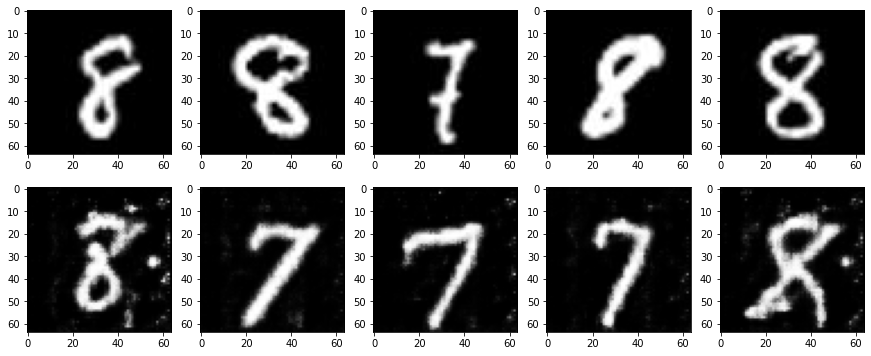

In [41]:
# 생성 이미지와 훈련 데이터를 시각화한다
# 이 셀은 몇 번을 재실행하고 있습니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 입력 난수 생성
batch_size = 8
z_dim = 20
fixed_z = torch.randn(batch_size, z_dim)
fixed_z = fixed_z.view(fixed_z.size(0), fixed_z.size(1), 1, 1)
fake_images = G_update(fixed_z.to(device))

# 훈련 데이터
batch_iterator = iter(train_dataloader)  # 반복자로 변환
imges = next(batch_iterator)  # 1번째 요소를 꺼낸다


# 출력
fig = plt.figure(figsize=(15, 6))
for i in range(0, 5):
    # 상단에 훈련 데이터를,
    plt.subplot(2, 5, i+1)
    plt.imshow(imges[i][0].cpu().detach().numpy(), 'gray')

    # 하단에 생성 데이터를 표시한다
    plt.subplot(2, 5, 5+i+1)
    plt.imshow(fake_images[i][0].cpu().detach().numpy(), 'gray')

### AnoGAN 본체

In [42]:
def Anomaly_score(x, fake_img, D, Lambda=0.1):

    # 테스트 화상 x와 생성 화상 fake_img의 픽셀 수준의 차이의 절대 값을 계산하여, 미니 배치마다 합을 구한다
    residual_loss = torch.abs(x-fake_img)
    residual_loss = residual_loss.view(residual_loss.size()[0], -1)
    residual_loss = torch.sum(residual_loss, dim=1)

    # 테스트 화상 x와 생성 화상 fake_img를 식별기 D에 입력하여, 특징량 맵을 꺼낸다
    _, x_feature = D(x)
    _, G_feature = D(fake_img)

    # 테스트 화상 x와 생성 화상 fake_img의 특징량의 차이의 절대값을 계산하여, 미니 배치마다 합을 구한다
    discrimination_loss = torch.abs(x_feature-G_feature)
    discrimination_loss = discrimination_loss.view(
        discrimination_loss.size()[0], -1)
    discrimination_loss = torch.sum(discrimination_loss, dim=1)

    # 미니 배치마다 2종류의 손실을 더한다
    loss_each = (1-Lambda)*residual_loss + Lambda*discrimination_loss

    # 미니 배치 전부의 손실을 구한다
    total_loss = torch.sum(loss_each)

    return total_loss, loss_each, residual_loss

### AnoGAN 이상 탐지 

In [43]:
# 테스트용 DataLoader 작성
def make_test_datapath_list():
    """학습 및 검증 화상 데이터와 어노테이션 데이터의 파일 경로 리스트를 작성한다. """

    train_img_list = list()  # 화상 파일 경로를 저장

    for img_idx in range(5):
        img_path = "./data/test/img_7_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

        img_path = "./data/test/img_8_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

        img_path = "./data/test/img_2_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

    return train_img_list


# 파일 리스트를 작성
test_img_list = make_test_datapath_list()

# Dataset 작성
mean = (0.5,)
std = (0.5,)
test_dataset = GAN_Img_Dataset(
    file_list=test_img_list, transform=ImageTransform(mean, std))

# DataLoader 작성
batch_size = 5

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False)

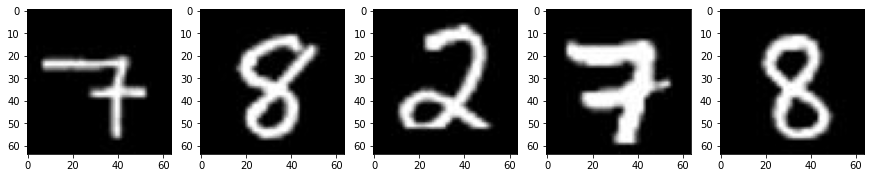

In [44]:
# 테스트 데이터 확인
batch_iterator = iter(test_dataloader)  # 반복자로 변환
imges = next(batch_iterator)  

# 첫번째 미니 배치를 꺼낸다
fig = plt.figure(figsize=(15, 6))
for i in range(0, 5):
    plt.subplot(2, 5, i+1)
    plt.imshow(imges[i][0].cpu().detach().numpy(), 'gray')

#### Only DCGAN -> 이상 탐지

In [46]:
# 이상 탐지할 화상
x = imges[0:5]
x = x.to(device)

# 이상 탐지할 화상을 생성하기 위한 초기 난수
z = torch.randn(5, 20).to(device)
z = z.view(z.size(0), z.size(1), 1, 1)

# # 변수 z를 미분할 수 있도록, requires_grad을 True로 설정
# z.requires_grad = True

# # 변수 z를 갱신할 수 있도록, z의 최적화 함수를 구한다
# z_optimizer = torch.optim.Adam([z], lr=1e-3)

# # z를 구한다
# for epoch in range(5000+1):
#     fake_img = G_update(z)
#     loss, _, _ = Anomaly_score(x, fake_img, D_update, Lambda=0.1)

#     z_optimizer.zero_grad()
#     loss.backward()
#     z_optimizer.step()

#     if epoch % 1000 == 0:
#         print('epoch {} || loss_total:{:.0f} '.format(epoch, loss.item()))

total loss:  [1113. 1308. 1463. 1320. 1187.]


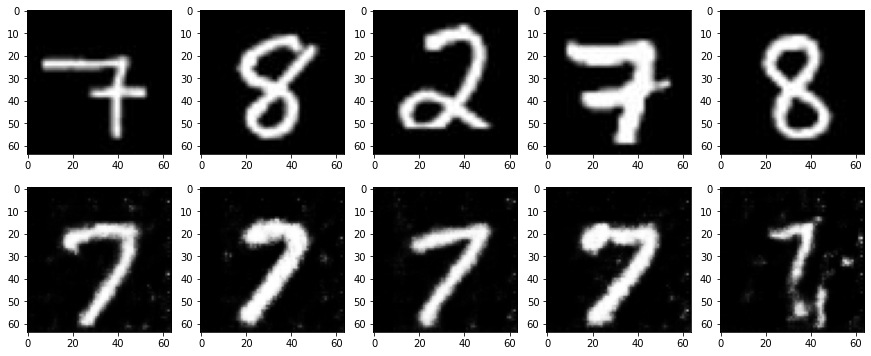

In [47]:
# 화상 생성
G_update.eval()
fake_img = G_update(z)

# 손실을 구한다
loss, loss_each, residual_loss_each = Anomaly_score(
    x, fake_img, D_update, Lambda=0.1)

# 손실 계산. 총 손실
loss_each = loss_each.cpu().detach().numpy()
print("total loss: ", np.round(loss_each, 0))

# 화상을 시각화
fig = plt.figure(figsize=(15, 6))
for i in range(0, 5):
    # 상단에 테스트 데이터를,
    plt.subplot(2, 5, i+1)
    plt.imshow(imges[i][0].cpu().detach().numpy(), 'gray')

    # 하단에 생성 데이터를 표시한다
    plt.subplot(2, 5, 5+i+1)
    plt.imshow(fake_img[i][0].cpu().detach().numpy(), 'gray')

#### DCGAN + AnoGAN -> 이상 탐지

In [48]:
# 이상 탐지할 화상
x = imges[0:5]
x = x.to(device)

# 이상 탐지할 화상을 생성하기 위한 초기 난수
z = torch.randn(5, 20).to(device)
z = z.view(z.size(0), z.size(1), 1, 1)

# 변수 z를 미분할 수 있도록, requires_grad을 True로 설정
z.requires_grad = True

# 변수 z를 갱신할 수 있도록, z의 최적화 함수를 구한다
z_optimizer = torch.optim.Adam([z], lr=1e-3)

# z를 구한다
for epoch in range(5000+1):
    fake_img = G_update(z)
    loss, _, _ = Anomaly_score(x, fake_img, D_update, Lambda=0.1)

    z_optimizer.zero_grad()
    loss.backward()
    z_optimizer.step()

    if epoch % 1000 == 0:
        print('epoch {} || loss_total:{:.0f} '.format(epoch, loss.item()))

epoch 0 || loss_total:7290 
epoch 1000 || loss_total:4365 
epoch 2000 || loss_total:3734 
epoch 3000 || loss_total:3515 
epoch 4000 || loss_total:3303 
epoch 5000 || loss_total:3200 


total loss:  [556. 527. 961. 541. 614.]


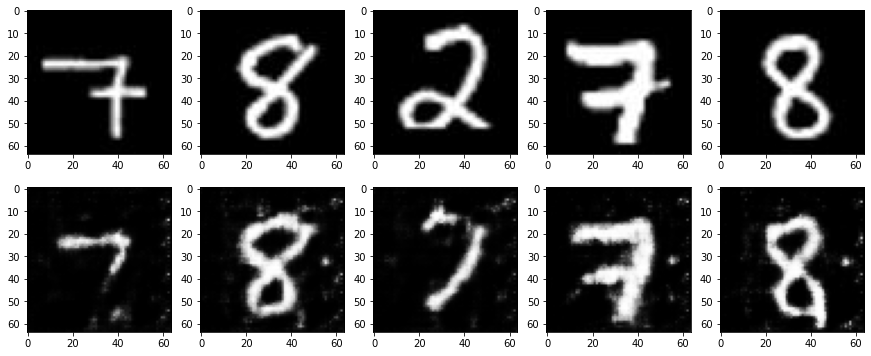

In [50]:
# 화상 생성
G_update.eval()
fake_img = G_update(z)

# 손실을 구한다
loss, loss_each, residual_loss_each = Anomaly_score(
    x, fake_img, D_update, Lambda=0.1)

# 손실 계산. 총 손실
loss_each = loss_each.cpu().detach().numpy()
print("total loss: ", np.round(loss_each, 0))

# 화상을 시각화
fig = plt.figure(figsize=(15, 6))
for i in range(0, 5):
    # 상단에 테스트 데이터를,
    plt.subplot(2, 5, i+1)
    plt.imshow(imges[i][0].cpu().detach().numpy(), 'gray')

    # 하단에 생성 데이터를 표시한다
    plt.subplot(2, 5, 5+i+1)
    plt.imshow(fake_img[i][0].cpu().detach().numpy(), 'gray')

## Efficient GAN

In [51]:
# 패키지 import
import random
import math
import time
import pandas as pd
import numpy as np
from PIL import Image

import torch
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import transforms

In [52]:
# Setup seeds
torch.manual_seed(1234)
torch.cuda.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)

### Generator 구현

In [53]:
class Generator(nn.Module):

    def __init__(self, z_dim=20):
        super(Generator, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(z_dim, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(inplace=True))

        self.layer2 = nn.Sequential(
            nn.Linear(1024, 7*7*128),
            nn.BatchNorm1d(7*7*128),
            nn.ReLU(inplace=True))

        self.layer3 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=128, out_channels=64,
                               kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True))

        self.last = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=1,
                               kernel_size=4, stride=2, padding=1),
            nn.Tanh())
        # 주의: 흑백 화상이므로 출력 채널은 하나 뿐임

    def forward(self, z):
        out = self.layer1(z)
        out = self.layer2(out)

        # 전치 합성곱 층에 넣으므로 텐서 형태로 변형
        out = out.view(z.shape[0], 128, 7, 7)
        out = self.layer3(out)
        out = self.last(out)

        return out

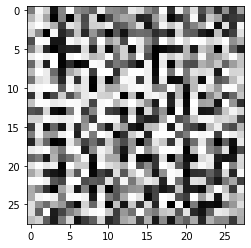

In [54]:
# 동작 확인
import matplotlib.pyplot as plt
%matplotlib inline

G = Generator(z_dim=20)
G.train()

# 입력 난수
# 배치 노멀라이제이션이 있으므로, 미니 배치 수는 2 이상
input_z = torch.randn(2, 20)

# 가짜 화상을 출력
fake_images = G(input_z)  # torch.Size([2, 1, 28, 28])
img_transformed = fake_images[0][0].detach().numpy()
plt.imshow(img_transformed, 'gray')
plt.show()

### Disriminator 구현

In [55]:
class Discriminator(nn.Module):

    def __init__(self, z_dim=20):
        super(Discriminator, self).__init__()

        # 화상 측 입력 처리
        self.x_layer1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4,
                      stride=2, padding=1),
            nn.LeakyReLU(0.1, inplace=True))
        # 주의: 흑백 화상이므로 입력 채널은 하나 뿐임

        self.x_layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=4,
                      stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1, inplace=True))

        # 난수 측 입력 처리
        self.z_layer1 = nn.Linear(z_dim, 512)

        # 최후 판정
        self.last1 = nn.Sequential(
            nn.Linear(3648, 1024),
            nn.LeakyReLU(0.1, inplace=True))

        self.last2 = nn.Linear(1024, 1)

    def forward(self, x, z):

        # 화상 측 입력 처리
        x_out = self.x_layer1(x)
        x_out = self.x_layer2(x_out)

        # 난수 측 입력 처리
        z = z.view(z.shape[0], -1)
        z_out = self.z_layer1(z)

        # x_out과 z_out을 결합하여, 전결합층에서 판정
        x_out = x_out.view(-1, 64 * 7 * 7)
        out = torch.cat([x_out, z_out], dim=1)
        out = self.last1(out)

        feature = out  # 최후에 채널을 하나로 집약
        feature = feature.view(feature.size()[0], -1)  # 2차원으로 변환

        out = self.last2(out)

        return out, feature

In [56]:
# 동작 확인
D = Discriminator(z_dim=20)

# 가짜 화상 생성
input_z = torch.randn(2, 20)
fake_images = G(input_z)

# 가짜 화상을 D에 입력
d_out, _ = D(fake_images, input_z)

# 출력 d_out에 Sigmoid를 곱해 0에서 1로 변환
print(nn.Sigmoid()(d_out))

tensor([[0.4322],
        [0.4629]], grad_fn=<SigmoidBackward0>)


### Encoder 구현

In [57]:
class Encoder(nn.Module):

    def __init__(self, z_dim=20):
        super(Encoder, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3,
                      stride=1),
            nn.LeakyReLU(0.1, inplace=True))
        # 주의: 흑백 화상이므로 입력 채널은 하나 뿐임

        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3,
                      stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1, inplace=True))

        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3,
                      stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1, inplace=True))

        # 여기까지 화상 크기는 7×7이 되어 있다
        self.last = nn.Linear(128 * 7 * 7, z_dim)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)

        # FC에 넣기 위해 텐서 형으로 변형
        out = out.view(-1, 128 * 7 * 7)
        out = self.last(out)

        return out

In [58]:
# 동작 확인
E = Encoder(z_dim=20)

# 입력할 화상 데이터
x = fake_images  # fake_images는 위에서 G로 작성한 것

# 화상에서 z를 Encode
z = E(x)

print(z.shape)
print(z)

torch.Size([2, 20])
tensor([[-0.0669, -0.2844, -0.3601,  0.1404, -0.2922, -0.4834, -0.0025,  0.0258,
         -0.1298, -0.2613, -0.4292, -0.2584, -0.6141, -0.1440,  0.1142,  0.2175,
          0.0730,  0.0323, -0.7176, -0.7410],
        [ 0.4822,  0.3681, -0.0647, -0.0773,  0.0989,  0.3012,  0.8054,  0.4399,
          1.0848, -0.2809,  0.0619, -0.3179, -0.2963, -0.1191,  0.6562, -0.1707,
          0.1287, -0.6156,  0.3127, -0.4819]], grad_fn=<AddmmBackward0>)


### DataLoader 작성

In [59]:
def make_datapath_list():
    """학습 및 검증 화상 데이터와 어노테이션 데이터의 파일 경로 리스트를 작성한다. """

    train_img_list = list()  # 화상 파일 경로를 저장

    for img_idx in range(200):
        img_path = "./data/img_78_28size/img_7_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

        img_path = "./data/img_78_28size/img_8_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

    return train_img_list

In [60]:
class ImageTransform():
    """화상의 전처리 클래스"""

    def __init__(self, mean, std):
        self.data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])

    def __call__(self, img):
        return self.data_transform(img)

In [61]:
class GAN_Img_Dataset(data.Dataset):
    """화상의 Dataset 클래스. PyTorch의 Dataset 클래스를 상속"""

    def __init__(self, file_list, transform):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        '''화상 매수를 반환한다'''
        return len(self.file_list)

    def __getitem__(self, index):
        '''전처리한 화상의 Tensor 형식 데이터 취득'''

        img_path = self.file_list[index]
        img = Image.open(img_path)  # [높이][폭]흑백

        # 화상 전처리
        img_transformed = self.transform(img)

        return img_transformed

In [62]:
# DataLoader 작성과 동작 확인

# 파일 리스트를 작성
train_img_list=make_datapath_list()

# Dataset 작성
mean = (0.5,)
std = (0.5,)
train_dataset = GAN_Img_Dataset(
    file_list=train_img_list, transform=ImageTransform(mean, std))

# DataLoader 작성
batch_size = 64

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

# 동작 확인
batch_iterator = iter(train_dataloader)  # 반복자로 변환
imges = next(batch_iterator)  # 1번째 요소를 꺼낸다
print(imges.size())  # torch.Size([64, 1, 64, 64])

torch.Size([64, 1, 28, 28])


### 학습

In [66]:
# 모델을 학습시키는 함수를 작성
def train_model(G, D, E, dataloader, num_epochs):

    # GPU가 사용 가능한지 확인
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("사용 장치: ", device)

    # 최적화 기법 설정
    lr_ge = 0.0001
    lr_d = 0.0001/4
    beta1, beta2 = 0.5, 0.999
    g_optimizer = torch.optim.Adam(G.parameters(), lr_ge, [beta1, beta2])
    e_optimizer = torch.optim.Adam(E.parameters(), lr_ge, [beta1, beta2])
    d_optimizer = torch.optim.Adam(D.parameters(), lr_d, [beta1, beta2])

    # 오차함수 정의
    # BCEWithLogitsLoss는 입력에 시그모이드(logit)을 곱한 뒤에,
    # 이진 크로스 엔트로피를 계산
    criterion = nn.BCEWithLogitsLoss(reduction='mean')

    # 파라미터를 하드코딩
    z_dim = 20
    mini_batch_size = 64

    # 네트워크를 GPU로
    G.to(device)
    E.to(device)
    D.to(device)

    G.train()  # 모델을 훈련 모드로
    E.train()  # 모델을 훈련 모드로
    D.train()  # 모델을 훈련 모드로

    # 네트워크가 어느 정도 고정되면, 고속화시킨다
    torch.backends.cudnn.benchmark = True

    # 화상의 매수
    num_train_imgs = len(dataloader.dataset)
    batch_size = dataloader.batch_size

    # 반복 카운터 설정
    iteration = 1
    logs = []

    # epoch 루프
    for epoch in range(num_epochs):

        # 개시 시간을 저장
        t_epoch_start = time.time()
        epoch_g_loss = 0.0  # epoch의 손실합
        epoch_e_loss = 0.0  # epoch의 손실합
        epoch_d_loss = 0.0  # epoch의 손실합

        print('-------------')
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-------------')
        print('(train)')

        # 데이터 로더에서 minibatch씩 꺼내는 루프
        for imges in dataloader:

            # 미니 배치 크기가 1이면, 배치 노멀라이제이션에서 에러가 발생하므로 피한다
            if imges.size()[0] == 1:
                continue

            # 미니 배치 크기의 1 또는 0의 라벨 역할의 텐서를 작성
            # 정답 라벨과 가짜 라벨 작성
            # epoch의 마지막 반복은 미니 배치 수가 줄어든다
            mini_batch_size = imges.size()[0]
            label_real = torch.full((mini_batch_size,), 1).to(device)
            label_fake = torch.full((mini_batch_size,), 0).to(device)

            # GPU가 사용 가능하면 GPU로 데이터를 보낸다
            imges = imges.to(device)

            # --------------------
            # 1. Discriminator 학습
            # --------------------
            # 진짜 화상을 판정　
            z_out_real = E(imges)
            d_out_real, _ = D(imges, z_out_real)

            # 가짜 화상을 생성해 판정
            input_z = torch.randn(mini_batch_size, z_dim).to(device)
            fake_images = G(input_z)
            d_out_fake, _ = D(fake_images, input_z)

            # 오차를 계산
            label_real = label_real.type_as(d_out_real.view(-1))
            d_loss_real = criterion(d_out_real.view(-1), label_real)
            label_fake = label_fake.type_as(d_out_fake.view(-1))
            d_loss_fake = criterion(d_out_fake.view(-1), label_fake)
            d_loss = d_loss_real + d_loss_fake

            # 역전파
            d_optimizer.zero_grad()
            d_loss.backward()
            d_optimizer.step()

            # --------------------
            # 2. Generator 학습
            # --------------------
            # 가짜 화상을 생성해 판정
            input_z = torch.randn(mini_batch_size, z_dim).to(device)
            fake_images = G(input_z)
            d_out_fake, _ = D(fake_images, input_z)

            # 오차를 계산
            g_loss = criterion(d_out_fake.view(-1), label_real)

            # 역전파
            g_optimizer.zero_grad()
            g_loss.backward()
            g_optimizer.step()

            # --------------------
            # 3. Encoder 학습
            # --------------------
            # 진짜 화상 z를 추정
            z_out_real = E(imges)
            d_out_real, _ = D(imges, z_out_real)

            # 오차를 계산
            e_loss = criterion(d_out_real.view(-1), label_fake)

            # 역전파
            e_optimizer.zero_grad()
            e_loss.backward()
            e_optimizer.step()

            # --------------------
            # 4. 기록
            # --------------------
            epoch_d_loss += d_loss.item()
            epoch_g_loss += g_loss.item()
            epoch_e_loss += e_loss.item()
            iteration += 1

        # epoch의 phase별 loss와 정답률
        t_epoch_finish = time.time()
        print('-------------')
        print('epoch {} || Epoch_D_Loss:{:.4f} ||Epoch_G_Loss:{:.4f} ||Epoch_E_Loss:{:.4f}'.format(
            epoch, epoch_d_loss/batch_size, epoch_g_loss/batch_size, epoch_e_loss/batch_size))
        print('timer:  {:.4f} sec.'.format(t_epoch_finish - t_epoch_start))
        t_epoch_start = time.time()

    print("총 반복 횟수: ", iteration)

    return G, D, E

In [67]:
# 네트워크 초기화
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        # conv2d와 ConvTranspose2d 초기화
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
    elif classname.find('BatchNorm') != -1:
        # BatchNorm2d 초기화
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
    elif classname.find('Linear') != -1:
        # 전결합층 Linear 초기화
        m.bias.data.fill_(0)


# 초기화 실시
G.apply(weights_init)
E.apply(weights_init)
D.apply(weights_init)

print("네트워크 초기화 완료")

네트워크 초기화 완료


In [68]:
# 학습 및 검증을 실행한다
# 15분 정도 걸립니다
num_epochs = 1500
G_update, D_update, E_update = train_model(
    G, D, E, dataloader=train_dataloader, num_epochs=num_epochs)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
timer:  0.2158 sec.
-------------
Epoch 786/1500
-------------
(train)
-------------
epoch 786 || Epoch_D_Loss:0.1164 ||Epoch_G_Loss:0.1065 ||Epoch_E_Loss:0.1313
timer:  0.2074 sec.
-------------
Epoch 787/1500
-------------
(train)
-------------
epoch 787 || Epoch_D_Loss:0.1088 ||Epoch_G_Loss:0.1188 ||Epoch_E_Loss:0.1253
timer:  0.2136 sec.
-------------
Epoch 788/1500
-------------
(train)
-------------
epoch 788 || Epoch_D_Loss:0.1071 ||Epoch_G_Loss:0.1207 ||Epoch_E_Loss:0.1304
timer:  0.2168 sec.
-------------
Epoch 789/1500
-------------
(train)
-------------
epoch 789 || Epoch_D_Loss:0.1125 ||Epoch_G_Loss:0.1131 ||Epoch_E_Loss:0.1216
timer:  0.2168 sec.
-------------
Epoch 790/1500
-------------
(train)
-------------
epoch 790 || Epoch_D_Loss:0.1293 ||Epoch_G_Loss:0.1077 ||Epoch_E_Loss:0.1187
timer:  0.2129 sec.
-------------
Epoch 791/1500
-------------
(train)
-------------
epoch 791 || Epoch_D_Loss:0.1308 ||Epoch_G_Loss:0.0993 ||Epoch_E_Loss

### 추론

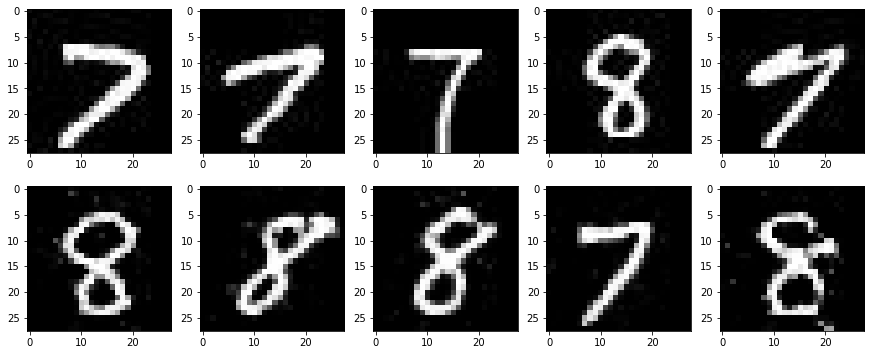

In [69]:
# 생성 화상과 훈련 화상을 시각화한다
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 입력 난수 생성
batch_size = 8
z_dim = 20
fixed_z = torch.randn(batch_size, z_dim)
G_update.eval()
fake_images = G_update(fixed_z.to(device))

# 훈련 데이터
batch_iterator = iter(train_dataloader)  # 반복자로 변환
imges = next(batch_iterator)  # 1번째 요소를 꺼낸다


# 출력
fig = plt.figure(figsize=(15, 6))
for i in range(0, 5):
    # 상단에 훈련 데이터를,
    plt.subplot(2, 5, i+1)
    plt.imshow(imges[i][0].cpu().detach().numpy(), 'gray')

    # 하단에 생성 데이터를 표시한다
    plt.subplot(2, 5, 5+i+1)
    plt.imshow(fake_images[i][0].cpu().detach().numpy(), 'gray')

### Efficient GAN 이상 탐지

In [70]:
# 테스트용 DataLoader 작성
def make_test_datapath_list():
    """학습 및 검증 화상 데이터와 어노테이션 데이터의 파일 경로 리스트를 작성한다. """

    train_img_list = list()  # 화상 파일 경로를 저장

    for img_idx in range(5):
        img_path = "./data/test_28size/img_7_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

        img_path = "./data/test_28size/img_8_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

        img_path = "./data/test_28size/img_2_" + str(img_idx)+'.jpg'
        train_img_list.append(img_path)

    return train_img_list


# 파일 리스트를 작성
test_img_list = make_test_datapath_list()

# Dataset 작성
mean = (0.5,)
std = (0.5,)
test_dataset = GAN_Img_Dataset(
    file_list=test_img_list, transform=ImageTransform(mean, std))

# DataLoader 작성
batch_size = 5

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False)

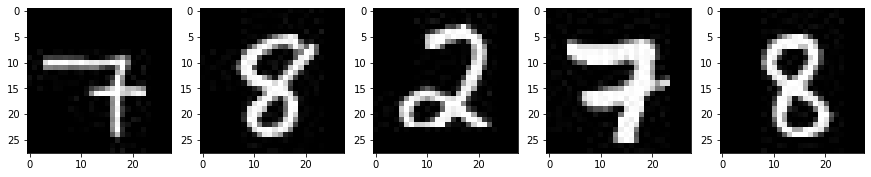

In [74]:
# 테스트 데이터 확인
batch_iterator = iter(test_dataloader)  # 반복자로 변환
imges = next(batch_iterator)  # 1번째 요소를 꺼낸다

fig = plt.figure(figsize=(15, 6))
for i in range(0, 5):
    # 훈련 데이터 표시
    plt.subplot(2, 5, i+1)
    plt.imshow(imges[i][0].cpu().detach().numpy(), 'gray')

In [75]:
def Anomaly_score(x, fake_img, z_out_real, D, Lambda=0.1):

    # 테스트 화상 x와 생성 화상 fake_img의 픽셀 수준의 차이의 절대 값을 계산하여, 미니 배치마다 합을 구한다
    residual_loss = torch.abs(x-fake_img)
    residual_loss = residual_loss.view(residual_loss.size()[0], -1)
    residual_loss = torch.sum(residual_loss, dim=1)

    # 테스트 화상 x와 생성 화상 fake_img를 식별기 D에 입력하여, 특징량 맵을 꺼낸다
    _, x_feature = D(x, z_out_real)
    _, G_feature = D(fake_img, z_out_real)

    # 테스트 화상 x와 생성 화상 fake_img의 특징량의 차이의 절대값을 계산하여, 미니 배치마다 합을 구한다
    discrimination_loss = torch.abs(x_feature-G_feature)
    discrimination_loss = discrimination_loss.view(
        discrimination_loss.size()[0], -1)
    discrimination_loss = torch.sum(discrimination_loss, dim=1)

    # 미니 배치마다 2종류의 손실을 더한다
    loss_each = (1-Lambda)*residual_loss + Lambda*discrimination_loss

    # 미니 배치 전부의 손실을 구한다
    total_loss = torch.sum(loss_each)

    return total_loss, loss_each, residual_loss

total loss:  [213. 151. 267. 287. 199.]


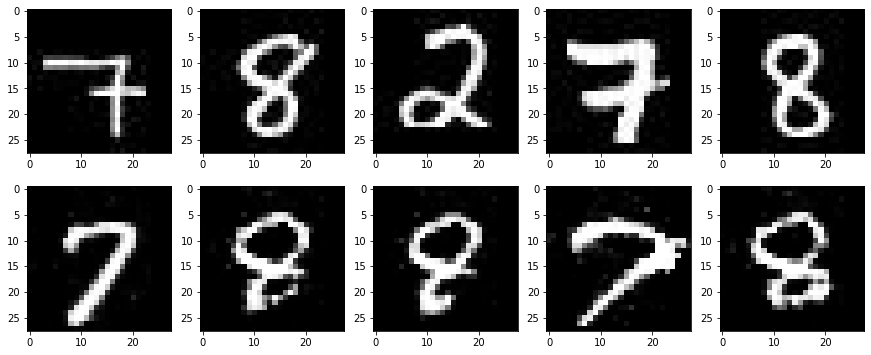

In [76]:
# 이상 탐지할 화상
x = imges[0:5]
x = x.to(device)

# 지도 데이터의 화상을 Encode하여 z로 한 뒤, G에서 생성
E_update.eval()
G_update.eval()
z_out_real = E_update(imges.to(device))
imges_reconstract = G_update(z_out_real)

# 손실을 구한다
loss, loss_each, residual_loss_each = Anomaly_score(
    x, imges_reconstract, z_out_real, D_update, Lambda=0.1)

# 손실 계산. 총 촌실
loss_each = loss_each.cpu().detach().numpy()
print("total loss: ", np.round(loss_each, 0))

# 화상을 시각화
fig = plt.figure(figsize=(15, 6))
for i in range(0, 5):
    # 상단에 훈련 데이터를,
    plt.subplot(2, 5, i+1)
    plt.imshow(imges[i][0].cpu().detach().numpy(), 'gray')

    # 하단에 생성 데이터를 표시한다
    plt.subplot(2, 5, 5+i+1)
    plt.imshow(imges_reconstract[i][0].cpu().detach().numpy(), 'gray')